#**Exploratory Data Analysis with Python**

**Exploratory data analysis (EDA)** is a very important step which takes place after data acquisition and should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions.

The purpose of EDA is to use statistical summary and visualizations to better understand data, and find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis. 

![Alt](https://drive.google.com/uc?id=1ml3iGEXcvRjWAVHCY2gJ3bG-UcDxXaYQ)

Source: Farcaster at English Wikipedia

#**Structured Data**

Structured data is data that is organized and is straightforward to analyse such as numerical and categorical data. Structured data conforms to a tabular format with relationship between the different rows and columns. Common examples of structured data are Excel files or SQL databases. Each of these have structured rows and columns that can be sorted.
The two types of structured we commonly deal with are categorical variables (which have a finite set of values) and numerical values (which are continuous).


###**Categorical Data(Qualitative)**

Categorical data can be counted, grouped and sometimes ranked in order of importance.Categorical variables can also be nominal or ordinal. 
* Nominal data has no intrinsic ordering to the categories. For example gender (Male, Female, Other) has no specific ordering. 
* Ordinal data as clear ordering such as three settings on a toaster (high,medium and low). 

Nominal data analyisis is done by grouping input variables into categories and calculating the percentage or mode of the distribution, while ordinal data is analysed by computing the mode, median and other positional measures like quartiles, percentiles, etc. 

**Binary data** is an important special case of categorical data that takes on only one of two values, such as 0/1, yes/no, or true/false. Another useful type of categorical data is ordinal data in which the categories are ordered; an example of this is a numerical rating (1, 2, 3, 4, or 5).

###**Numerical Data(Quantitative)**

These data have meaning as a measurement, such as a person’s height, weight, IQ, or blood pressure; or they’re a count, such as the number of stock shares a person owns, how many teeth a dog has, or how many pages you can read of your favorite book before you fall asleep. 

Numerical data can be further broken into two types: discrete and continuous.

* **Discrete data** represent items that can be counted; they take on possible values that can be listed out. The list of possible values may be fixed (also called finite); or it may go from 0, 1, 2, on to infinity (making it countably infinite). For example, the number of heads in 100 coin flips takes on values from 0 through 100 (finite case), but the number of flips needed to get 100 heads takes on values from 100 (the fastest scenario) on up to infinity (if you never get to that 100th heads).

* **Continuous data** represent measurements; their possible values cannot be counted and can only be described using intervals on the real number line. For example, the exact amount of gas purchased at the pump for cars with 20-gallon tanks would be continuous data from 0 gallons to 20 gallons, represented by the interval [0, 20], inclusive. You might pump 8.40 gallons, or 8.41, or 8.414863 gallons, or any possible number from 0 to 20. In this way, continuous data can be thought of as being uncountably infinite. 

 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [5]:
#path = r'/content/drive/MyDrive/Automobile_data.csv'
df = pd.read_csv("Data/Automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Replacing '?' with NaN

In [6]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Detecting Missing values

In [7]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Count missing values in each column



In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

## Replace by mean:

* "normalized-losses": 41 missing data, replace them with mean

* "stroke": 4 missing data, replace them with mean

* "bore": 4 missing data, replace them with mean

* "horsepower": 2 missing data, replace them with mean

* "peak-rpm": 2 missing data, replace them with mean


## Replace by frequency:

* "num-of-doors": 2 missing data, replace them with "four".
    
Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur



## Drop the whole row:

* "price": 4 missing data, simply delete the whole row

Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

## **Descriptive Statistics**

### **Mean, Median, Standard Deviation and Coefficient of Variance**

The sample mean is the average and is computed as the sum of all the observed outcomes  from the sample divided by the total number of events.  We use x as the symbol for the sample mean.  In math terms, 

![](https://drive.google.com/uc?export=view&id=1evavjNWnoUopHCwzW4NPcm8vRHoEB69l)
        
where n is the sample size and the x correspond to the observed valued.

**Example 1**:

Suppose you randomly collected prices of pizza

        34, 43, 81, 106, 106 and 115 

We compute the sample mean by adding and dividing by the number of samples, 6.

             (34 + 43 + 81 + 106 + 106 + 115)/6 =  80.83   
                                                                     

We can say that the sample mean of the price of pizza is **80.83**.

### Mode 
The mode of a set of data is the number with the highest frequency.  In the above example 106 is the mode, since it occurs twice and the rest of the outcomes occur only once.

### Median 
The median is the middle score.  If we have an even number of events we take the average of the two middles.
In the example above, the median is
                   
        (81 + 106)/2 = 93.5

There is an alternative value that also is resistant to outliers(a data value that is very different from most of the data). This is called the **trimmed mean** which is the mean after getting rid of the outliers or 5% on the top and 5% on the bottom.  
* We can also use the trimmed mean if we are concerned with outliers skewing the data, however the median is used more often since more people understand it.

**Example 2**:

At a ski rental shop data was collected on the number of rentals on each of ten consecutive Saturdays: 

        44, 50, 38, 96, 42, 47, 40, 39, 46, 50.

## Can you calculate the Mean, Median and Mode for this data? 

<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />

To find the sample mean, add them and divide by 10:

        ( 44 + 50 + 38 + 96 + 42 + 47 + 40 + 39 + 46 + 50 )/10 = 49.2
                                                                                       
          
Notice that the mean value is not a value of the sample.

To find the median, first sort the data:

        38, 39, 40, 42, 44, 46, 47, 50, 50, 96

Notice that there are two middle numbers 44 and 46.  To find the median we take the average of the two.

                           Median  =  (44 + 46)/2 =  45
                            
                                              
The mean, mode, median do a nice job in telling where the center of the data set is, but often we are interested in more.  

**For example**, a pharmaceutical engineer develops a new drug that regulates iron in the blood. Suppose she finds out that the average sugar content after taking the medication is the optimal level. 
* This does not mean that the drug is effective.  
* There is a possibility that half of the patients have dangerously low sugar content while the other half have dangerously high content.  
* Instead of the drug being an effective regulator, it is a deadly poison.  
* What the pharmacist needs is a measure of how far the data is spread apart.  

This is what the **variance and standard deviation** do.  First we show the formulas for these measurements.  Then we will go through the steps on how to use the formulas.

###**Variance,  Standard Deviation and Coefficient of Variation** 

The variance is defined as

![](https://drive.google.com/uc?export=view&id=1ORw5eazjxpHHI-_ehHzPAlCWf7cgd360)


The standard deviation is 

![](https://drive.google.com/uc?export=view&id=1-v_1KiA8wNI-QdqbpsupmHOnFY2pcV-Z)


**Variance and Standard Deviation: Step by Step**

       Calculate the mean, x.
       Write a table that subtracts the mean from each observed value.
       Square each of the differences.
       Add this column.
       Divide by n -1 where n is the number of items in the sample  This is the variance.

* To get the standard deviation we take the square root of the variance.  

 
**Example**

The owner of a restaurant is interested in how much people spend at the restaurant.  He examines 10 randomly selected receipts for parties of four and writes down the following data.

        44,   50,   38,   96,   42,   47,   40,   39,   46,   50

He calculated the mean by adding and dividing by 10 to get

        X̅  =  49.2

**Let's Calculate using the Formula:** 

![](https://drive.google.com/uc?export=view&id=1ORw5eazjxpHHI-_ehHzPAlCWf7cgd360)

Below is the table for getting the standard deviation:


![](https://drive.google.com/uc?export=view&id=15DgaeMHsRbYT_rB_z7c8M6ln--oMi9fn)

[source](http://www.ltcconline.net/greenl/courses/201/descstat/mean.htm)


Now 

        2600.4/(10-1) =  288.7

Hence 
* the variance is 289 and 
* the standard deviation is the square root of  289 = 17.



Since the standard deviation can be thought of measuring how far the data values lie from the mean, we take the mean and move one standard deviation in either direction.  The mean for this example was about 49.2 and the standard deviation was 17.  We have:
 
49.2 - 17 = 32.2

 
and
 
49.2 + 17 = 66.2
 
What this means is that most of the patrons probably spend between   $32.20  and  $66.20

The sample standard deviation will be denoted by s and the population standard deviation will be denoted by the Greek letter 
![](https://drive.google.com/uc?export=view&id=1d4UNuQuEes7RUc4i5hjW3FC2kVcHpU0S)

The sample variance will be denoted by ![](https://drive.google.com/uc?export=view&id=1nY0v-uaT-1vRh6rc5OEH1jjbdiv6q50M)
 and the population variance will be denoted by 
![](https://drive.google.com/uc?export=view&id=1wmizR7jLHAzY-67oZfxbAkfI3vxYzkIu)

### The variance and standard deviation describe how spread out the data is.  
* If the data all lies close to the mean, then the standard deviation will be small, while if the data is spread out over a large range of values, 
![](https://drive.google.com/uc?export=view&id=1nY0v-uaT-1vRh6rc5OEH1jjbdiv6q50M) will be large.  Having outliers will increase the standard deviation.

* One of the flaws involved with the standard deviation, is that it depends on the units that are used.  One way of handling this difficulty, is called the **coefficient of variation** which is the standard deviation divided by the mean times 100%
![](https://drive.google.com/uc?export=view&id=1zFjog2XZSnGmtPjvgFZ4l1zZUWXmKBn1)

In the above example, it is 

         (17/49.2)100%   =  34.6%


This tells us that: 
### The standard deviation of the restaurant bills is 34.6% of the mean.



## Data Cleaning 
## Replace by mean:

* "normalized-losses": 41 missing data, replace them with mean

* "stroke": 4 missing data, replace them with mean

* "bore": 4 missing data, replace them with mean

* "horsepower": 2 missing data, replace them with mean

* "peak-rpm": 2 missing data, replace them with mean


### Computing mean of "normalized losses"

In [9]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


### Replacing missing data in "normalized losses" with mean

In [10]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

### Repeating the same **Replacing by Mean** for bore

In [11]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


### Replacing missing data in "bore" with mean




In [12]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

**Question**

## Can you Replace NaN in "stroke","horsepower", and "peak-rpm" columns by mean? 
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br></br>
</br>


In [13]:
avg_stroke=df['stroke'].astype('float').mean(axis=0)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
avg_horsepower=df['horsepower'].astype('float').mean(axis=0)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
avg_peak_rpm=df['peak-rpm'].astype('float').mean(axis=0)
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)

In [14]:
avg_stroke=df['stroke'].astype('float').mean(axis=0)
avg_stroke

3.2554228855721337

In [15]:
avg_horsepower=df['horsepower'].astype('float').mean(axis=0)
avg_horsepower

104.25615763546797

In [16]:
avg_peak_rpm=df['peak-rpm'].astype('float').mean(axis=0)
avg_peak_rpm

5125.369458128079

### Replacing by Frequency (MODE)
## Replace by frequency:

* "num-of-doors": 2 missing data 

#### To see which values are present in the column, 'num-of-doors' we can use the ".value_counts()" method:**

In [17]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

**Using the ".idxmax()" method to calculate for us the most common type automatically:**

In [18]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [19]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

    
Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur


## Drop the whole row:

* "price": 4 missing data, simply delete the whole row

Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

In [20]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [21]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Data Formatting 


In [22]:
#list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


### Convert data types to proper format

In [23]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")


In [24]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Looking at the current dtypes, Do you think any other variable needs to be changed into numberic data type (int or float)?
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br></br>
</br>
</br>
</br>


### Data Description 
The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show: the count of that variable the mean the standard deviation (std) the minimum value the IQR (Interquartile Range: 25%, 50% and 75%) the maximum value

In [25]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,6600.000000,49.000000,54.000000,45400.000000


**We can apply the method "describe" on the variables of type 'object' as follows:**

In [26]:
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower
count,201,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8,59
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,68
freq,32,181,165,115,94,118,198,145,157,92,19


In [27]:
df.describe(include=['float64'])

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.797015,174.200995,65.889055,53.766667,3.330692,3.256874,10.164279,5117.665368,13207.129353
std,6.066366,12.322175,2.101471,2.447822,0.268072,0.316048,4.004965,478.113805,7947.066342
min,86.600000,141.100000,60.300000,47.800000,2.540000,2.070000,7.000000,4150.000000,5118.000000
25%,94.500000,166.800000,64.100000,52.000000,3.150000,3.110000,8.600000,4800.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,3.310000,3.290000,9.000000,5125.369458,10295.000000
75%,102.400000,183.500000,66.600000,55.500000,3.580000,3.410000,9.400000,5500.000000,16500.000000
max,120.900000,208.100000,72.000000,59.800000,3.940000,4.170000,23.000000,6600.000000,45400.000000


### check for duplicates

In [28]:

duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


##**Exploring the data**

We frequently encounter the situation where we would like to understand how a particular variable is distributed in a dataset. 

## Frequency table

A tally of the count of numeric data values that fall into a set of intervals (bins).
    
![](https://drive.google.com/uc?export=view&id=1Vc7cxXbP-5drXQNIzIUh9T6Nf5NaP6sE)

[source](https://clauswilke.com/dataviz/histograms-density-plots.html)

## Histogram

A plot of the frequency table with the bins on the x-axis and the count (or proportion) on the y-axis.
A histogram is a way to visualize a frequency table, with bins on the x-axis and data count on the y-axis. 
Data are binned into intervals and height of the bars represent the number of cases that fall into each interval.
They are also very useful for identifying shapes of distributions. When the bin width is too wide, we might lose interesting details. When the bin width is too narrow, It might be difficult to get an overall picture of the distribution. The ideal bin width depends on the data you’re working with.
 In general, histograms are plotted such that:

    Empty bins are included in the graph.

    Bins are equal width.

    Number of bins (or, equivalently, bin size) is up to the user.

    Bars are contiguous—no empty space shows between bars, unless there is an empty bin.


![](https://drive.google.com/uc?export=view&id=1XIgjr57dVhn78uSSMlBpzyosYKR56Uzs)

[source](https://statistics.laerd.com/statistical-guides/understanding-histograms.php)

## Density Plot

Related to the histogram is a density plot, a smooth version of the histogram, which shows the distribution of data values as a continuous line. A density plot can be thought of as a smoothed histogram, although it is typically computed directly from the data through a kernel density estimate.
![](https://drive.google.com/uc?export=view&id=1c8IlHdeY_yVU23uxvQWw6s15BuNI3Yea)

[source](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)


## Boxplots

(Box and whiskers plot), are based on percentiles and give a quick way to visualize the distribution of data.


![](https://drive.google.com/uc?export=view&id=1Q6YlY_QRPaK6Pi4AeJrMMEhUsbSnPAz4)

[source](https://www.google.com/imgres?imgurl=https%3A%2F%2Fdata-flair.training%2Fblogs%2Fwp-content%2Fuploads%2Fsites%2F2%2F2018%2F10%2Fbpw.png&imgrefurl=https%3A%2F%2Fdata-flair.training%2Fblogs%2Fqlikview-box-plot-wizard%2F&tbnid=nGZG6Yf8vTThRM&vet=12ahUKEwjvotLE0bjuAhWS2lkKHd_5DqgQMygFegUIARCgAQ..i&docid=R5yXFF0jMra-HM&w=441&h=459&q=box%20plot%20ibm%20developer&ved=2ahUKEwjvotLE0bjuAhWS2lkKHd_5DqgQMygFegUIARCgAQ)


![](https://drive.google.com/uc?export=view&id=1T4EI8S2LWrGxw6muygr1ZIl6ZOHDGHJN)

[source](https://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1200%2F1*2c21SkzJMf3frPXPAR_gZA.png&imgrefurl=https%3A%2F%2Ftowardsdatascience.com%2Funderstanding-boxplots-5e2df7bcbd51&tbnid=uPp4NzKBIJ_T0M&vet=12ahUKEwjvotLE0bjuAhWS2lkKHd_5DqgQMygXegUIARDFAQ..i&docid=wN67PhrXOIxYuM&w=1200&h=600&q=box%20plot%20ibm%20developer&ved=2ahUKEwjvotLE0bjuAhWS2lkKHd_5DqgQMygXegUIARDFAQ)

The top and bottom of the box are the 75th and 25th percentiles, respectively. The median is shown by the horizontal line in the box. The dashed lines, referred to as whiskers, extend from the top and bottom to indicate the range for the bulk of the data. 



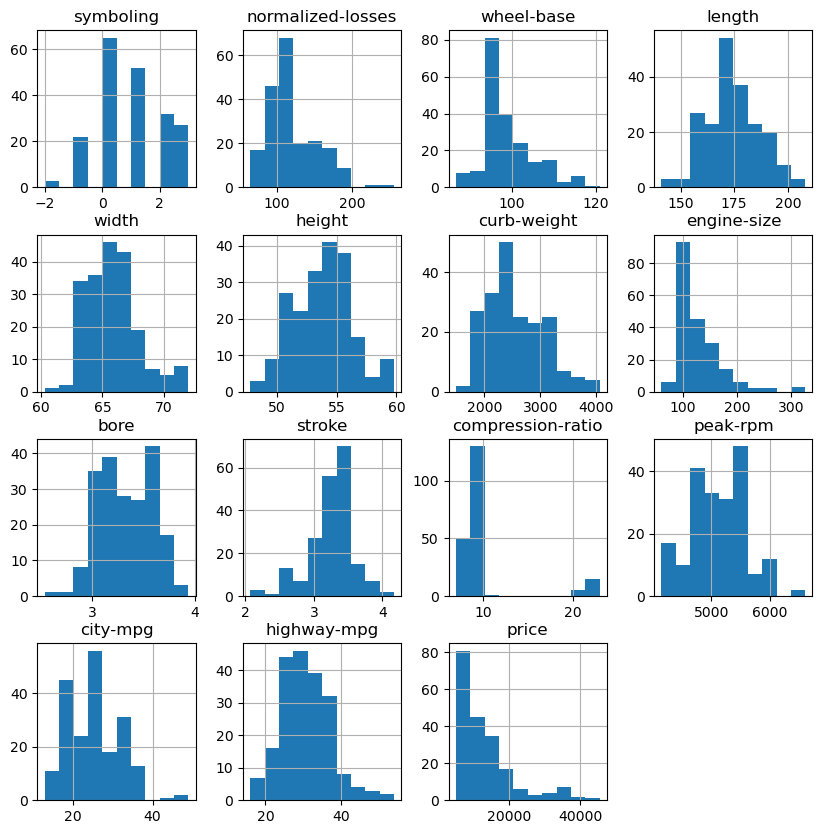

In [29]:
#histograms for each variable in df
hist = df.hist(bins=10,figsize =(10,10))

C:\Users\e6430\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

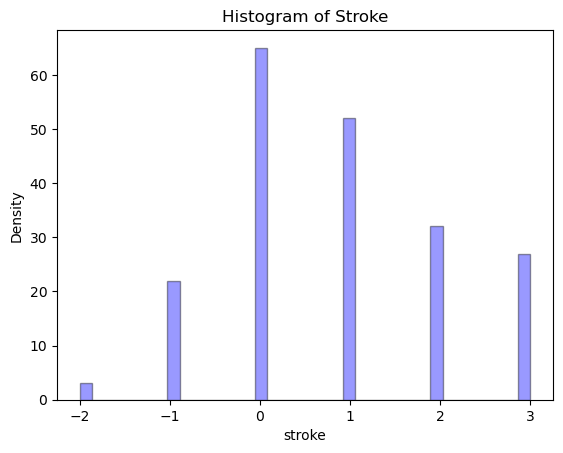

In [30]:

# seaborn histogram
sns.distplot(df['symboling'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Stroke')
plt.xlabel('stroke')
plt.ylabel('Density')

<AxesSubplot:xlabel='stroke', ylabel='Density'>

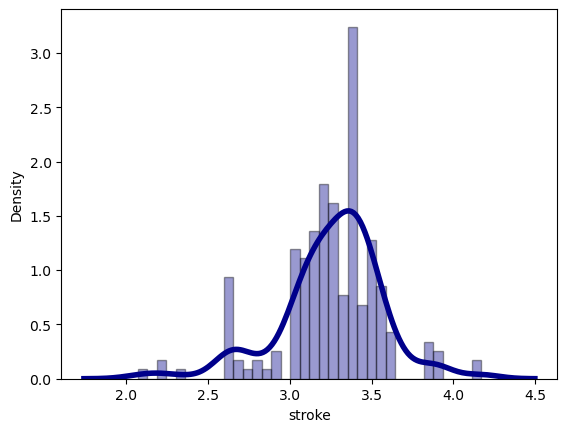

In [31]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['stroke'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\e6430\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

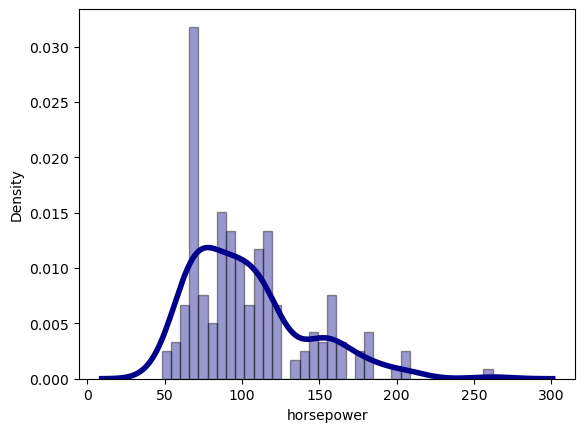

In [32]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['horsepower'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

**Distribution of the different categories of drive wheels over price using box plot**

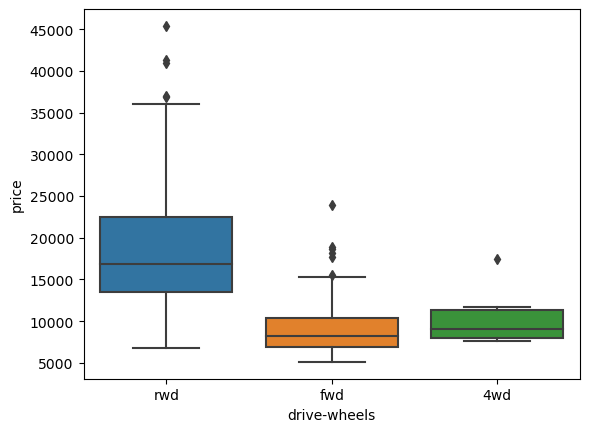

In [33]:
sns.boxplot(x = 'drive-wheels', y='price', data =df)
plt.show()

<AxesSubplot:xlabel='body-style', ylabel='price'>

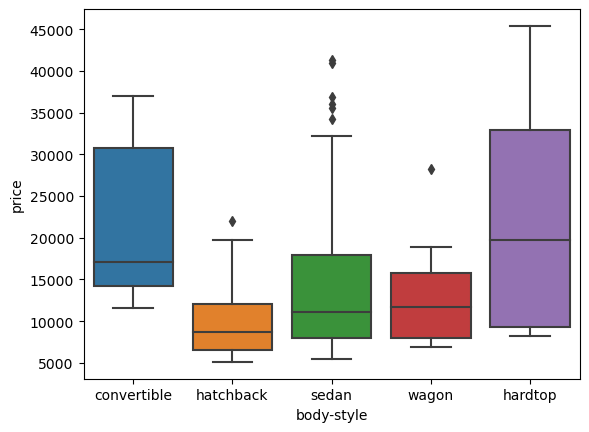

In [34]:
sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

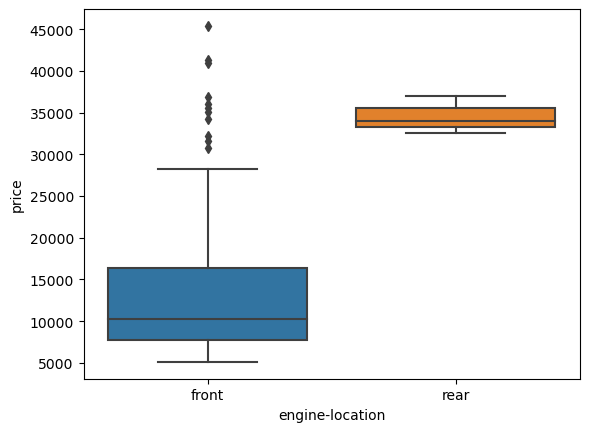

In [35]:
sns.boxplot(x="engine-location", y="price", data=df)

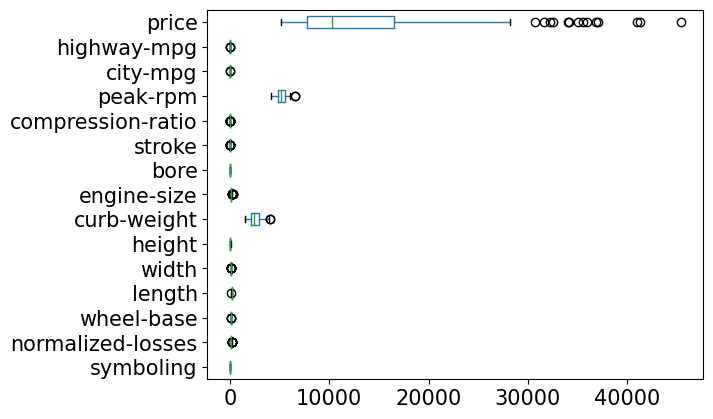

In [36]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=15)

##**Exploring Binary and Categorical Data**

For categorical data, simple proportions or percentages tell the story of the data.

## Mode

The most commonly occurring category or value in a data set.


## Probability
The most basic definition would be the likelihood that some event will occur.

The rule is simple. The desired outcome divided by all possible outcomes. The probability of an event is always between 0 and 1.

**P(A), probability of A.**

**Example 1:**
    What are the chances of getting heads 3 times in a row?

The sample space, which is a list of all the possible outcomes, has 8 possible outcomes: HHH, HHT, HTH, THH, etc. So, the probability of getting heads 3 times in a row is 1/8, or 12.5%.

**Example 2:**
    What are the odds I will roll a pair of dice and get two sixes?

The sample space has 36 possible outcomes: (1,1), (1,2), (1,3), etc. Only one of those is the desired outcome (6,6). Our probability of rolling double sixes is 1/36.


## Random Variable

A random variable is the outcome, a set of possible values (head or tail), of a random process (tossing a coin). When we toss a coin, we know that it can land on heads or tails, but we don’t know which one.Random variables can be discrete or continuous. Discrete can only take certain values while continuous can take any value (within a range).


## Events

### Independent events:

Two processes are said to be independent if knowing the outcome of one provides no useful information about the outcome of the other.
![](https://drive.google.com/uc?export=view&id=17zp_ul5bMaKdZE01umOlz2yjJT7jQpPO)

[source](https://www.coursera.org/learn/probability-intro/lecture/D1m0l/independence)

### Dependent events: 

Two processes are said to be dependent if knowing the outcome of provides useful information about the outcome of the other. i.e It is affected by previous events
E.g. What are your chances of getting 2 heads in a row if the first toss was a head.
</br>
</br>
</br>
</br>
# Conditional Probability

This is used to define probability between dependent events.
E.g Consider 2 events, A and B, where A occurs before B. Conditional probability is used to calculate the probability of Boccurring after A has occurred. The occurrence of A changes the probability of the occurrence of B.
P(AnB) = P(B/A) X P(A)

**Example 1:**

Given a coin, what are your chances of getting two heads in nthe first two tosses?
A = Getting head on first toss
B = Getting head on second toss

    P(A) = P(Getting head on first toss) = 1/2
    P(B) = 1/2

![](https://drive.google.com/uc?export=view&id=1W48_Nmnwk1XJ0ls50O3GjbXTCO88DxaG)


There is a 12.5% chance of getting two heads on the first two tosses

**Example 2:**

What is the probability of getting a king after getting a queen from a deck of cards?
A = Getting king on 1st draw
B = Getting queen on 2nd draw

    P(A) = P(Getting king on 1st draw)
    = Total No of kingd/Total ouctcomes
    = 4/52 
    = 0.077

    P(B/A) = No of queens after getting a king
    = 4/51 
    = 0.078

    P(AnB) = P(B/A) X P(A) 
    = 0.078 * 0.077
    = 0.006
There is a 0.6% chance of getting a queen after getting a king.

## Expected value

When the categories can be associated with a numeric value, this gives an average value based on a category’s probability of occurrence.


## Pie charts

The frequency or proportion for each category plotted as wedges in a pie.

Getting a summary of a binary variable or a categorical variable with a few categories is a fairly easy matter: we just figure out the proportion of 1s, or of the important categories. 

## Bar charts

The frequency or proportion for each category plotted as bars.


Bar charts are a common visual tool for displaying a single categorical variable, often seen in the popular press. Categories are listed on the x-axis, and frequencies or proportions on the y-axis. 

![](https://drive.google.com/uc?export=view&id=1cjoIZhLMsUviMk6wQMmABm-pe-KbxfYd)

[source](https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.perkinselearning.org%2Fsites%2Felearning.perkinsdev1.org%2Ffiles%2FBar%2520Chart.PNG&imgrefurl=https%3A%2F%2Fwww.perkinselearning.org%2Ftechnology%2Fblog%2Fcreating-accessible-bar-chart-pages-app-ios-11&tbnid=lMsAohMq_sJ4gM&vet=12ahUKEwiQvuT4yrjuAhUSgFkKHfOKDI0QMygCegUIARDWAQ..i&docid=Bc1n2-Anj4YMtM&w=2048&h=1536&q=bar%20chart&ved=2ahUKEwiQvuT4yrjuAhUSgFkKHfOKDI0QMygCegUIARDWAQ)

Note that a bar chart resembles a histogram; in a bar chart the x-axis represents different categories of a factor variable, while in a histogram the x-axis represents values of a single variable on a numeric scale. In a histogram, the bars are typically shown touching each other, with gaps indicating values that did not occur in the data. In a bar chart, the bars are shown separate from one another.


## Mode

The mode is the value—or values in case of a tie—that appears most often in the data. The mode is a simple summary statistic for categorical data, and it is generally not used for numeric data.

## Expected Value

A special type of categorical data is data in which the categories represent or can be mapped to discrete values on the same scale.
A marketer for a new cloud technology, for example, offers two levels of service, one priced at 300/month and another at 50/month. 

The marketer offers free webinars to generate leads, and the firm figures that:
* 5% of the attendees will sign up for the 300 service,
* 15% for the 50 service, and 
* 80% will not sign up for anything. 

This data can be summed up, for financial purposes, in a single “expected value,” which is a form of weighted mean in which the weights are probabilities.

The expected value is calculated as follows:

    Multiply each outcome by its probability of occurring.

    Sum these values.

In the cloud service example, the expected value of a webinar attendee is thus 22.50 per month, calculated as follows:

    E V = ( 0 . 05 ) ( 300 ) + ( 0 . 15 ) ( 50 ) + ( 0 . 80 ) ( 0 ) = 22 . 5

The expected value is really a form of **weighted mean**: it adds the ideas of future expectations and probability weights, often based on subjective judgment. 
    

##**Correlation  - Scatterplots**

Correlation is a measure of the extent of interdependence between variables. In other words, how are the features dependent on the variable, price? 

Scatter plots show how much one variable is affected by another. The relationship between two variables is called their correlation 

The closer the data points come to forming a straight line when plotted, the higher the correlation between the two variables, or the stronger the relationship. Correlation is Positive when the values increase together, and Correlation is Negative when one value decreases as the other increases.




![](https://drive.google.com/uc?export=view&id=1bHWNNzMqjpsltioGt7acrq5SPb_0OZ3Y)

[source](https://www.mathsisfun.com/data/images/correlation-examples.svg)




In [37]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,-0.267392,-0.582027,-0.591309,0.543155
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,-0.063561,-0.033956,-0.034636,0.082269


### Understanding relationship between continous variables: 

* price and engine size. 

Using scatter plot to visualize if engine size can predict the price of a car

(0.0, 53546.34330614943)

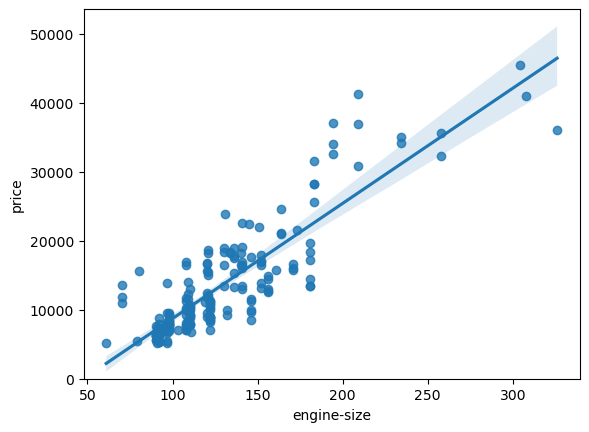

In [38]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

## Highway mpg is a potential predictor variable of price

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

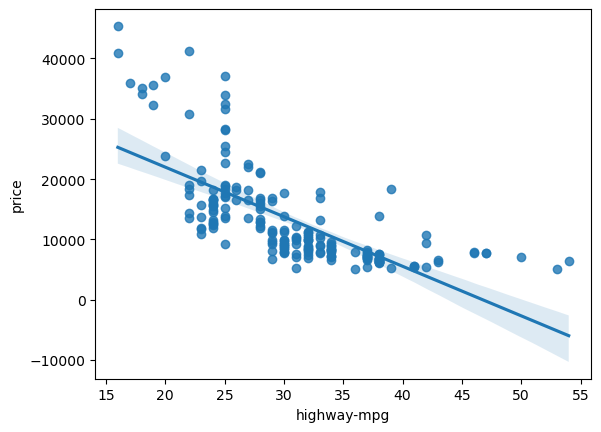

In [39]:
sns.regplot(x="highway-mpg", y="price", data=df)

## Let's see if "Peak-rpm" as a predictor variable of "price"

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

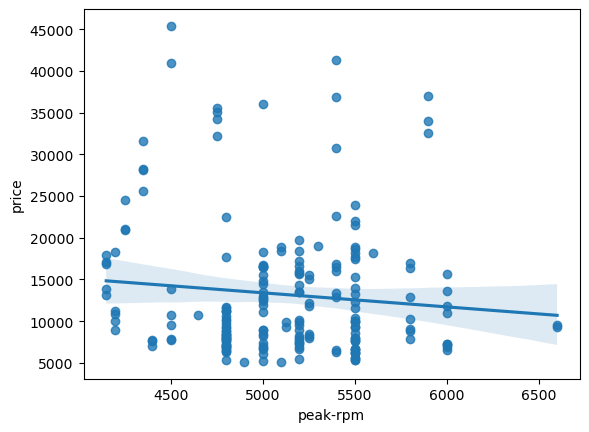

In [40]:
sns.regplot(x="peak-rpm", y="price", data=df)

<AxesSubplot:xlabel='stroke', ylabel='price'>

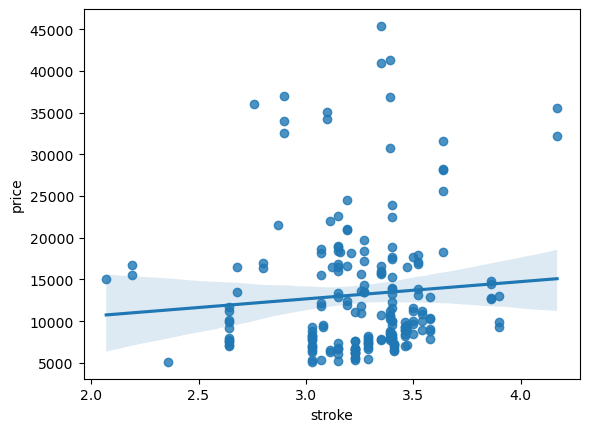

In [41]:
sns.regplot(x="stroke", y="price", data=df)

## Correlation Plot Matrix

A scatter plot matrix is a grid (or matrix) of scatter plots used to visualize bivariate relationships between combinations of variables. Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart.


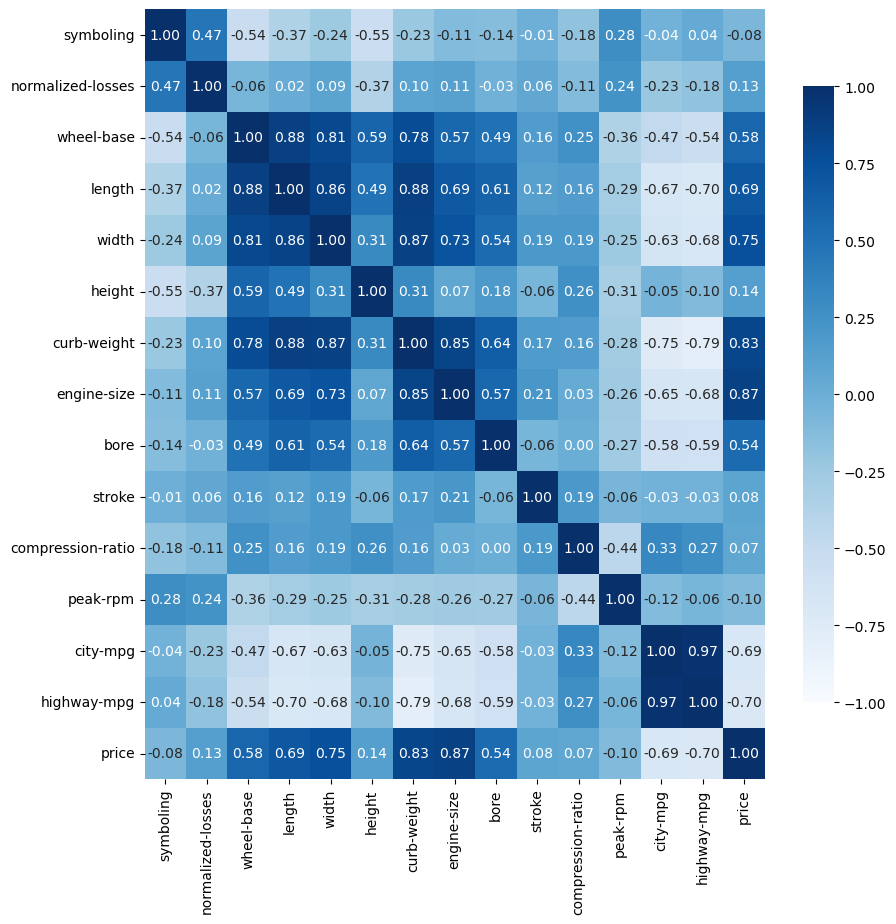

In [42]:
#Heat Map of Correlation
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.yticks(rotation=0)
plt.show()

# Choosing the Right features: 

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

    Length
    Width
    Curb-weight
    Engine-size
    Horsepower
    City-mpg
    Highway-mpg
    Wheel-base
    Bore

Categorical variables:

    Drive-wheels

After this exploration,feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.
</br>
</br>
</br>
</br>
</br>



#**Contour plots**
Contours are plots where 3 dimensions are represented on 2 dimensional surface. 
These are either plots of function of two variables or can be plot of three variables such that two variables are on X and Y axis and the third variable Z that is represented by Contour (Slices) 

These plots are very useful in obtaining interactions among variables.
If we know how does Z (variable respresnted on contours) change as a function of X and Y, we can use contour function in python inside the matplotlib library to obtain contour plots. 

The contour plot can also be graphed between 2 variables just to visualise function of those two variables. Visualizing the graph of a function of two variables is a useful device to help understand how a function behaves. For a function of two variables, the graph is a surface in 3D space.

For the automobile dataset we will obtain a contour plot of 2 variables: engine-size and highway-mpg and visualise their behaviour pattern.

C:\Users\e6430\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine-size', ylabel='highway-mpg'>

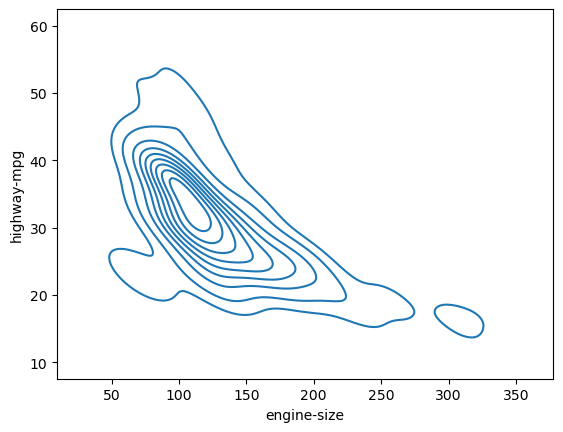

In [43]:
x = df['engine-size'] 
y = df['highway-mpg'] 
sns.kdeplot( x, y, legend = True)

To add descriptive value to graph the colour bar is set for contours to capture intensity/importance of these contours. 

From the plot above it is not clear as to which regions have high density or which regions have low density. So let us customize the density plot by color coding the contour lines.

C:\Users\e6430\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\e6430\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='engine-size', ylabel='highway-mpg'>

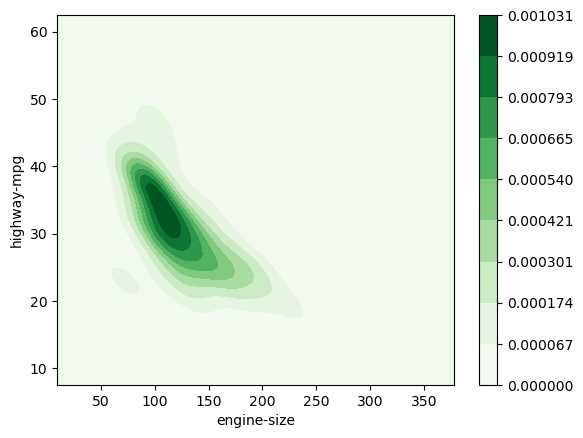

In [44]:
sns.kdeplot(x, y, legend = True,cmap="Greens", shade=True, shade_lowest=True,cbar=True)

We have applied “Greens” colormap to the above plot. “Greens” is a sequential colormap which is best to visualize numeric data that progresses from low to high by gradually increasing darkness and saturation of the color. By default, darker colors represent higher density values.

Note : We can also specify the number of levels that we want to see in the contour plot using n_levels argument in function above.
If there are too few levels in the map, important details may be lost, while too many levels makes the plot look cluttered.

**USAGE**

* Contour plots are mainly used for geospatial data. They are a useful for visualising
surface representation.
The distribution of the contour lines shows how values change across a surface. 
Where there is little change in a value, the lines are spaced farther apart. 
Where the values rise or fall rapidly, the lines are closer together. 
In Geospatial data are highly useful because they allow you to simultaneously visualize flat and steep areas.

 **EXAMPLE**

  Lets see an example: Here objective is to visualise two south american mammals namely : Bradypus variegatus known as the Brown-throated Sloth (represented by puprple points on map below ) and Microryzomys minutus also known as the Forest Small Rice Rat ( represented by red points on the map).

  Note: Dataset can be found here = sklearn.datasets.fetch_species_distributions

  Aim is here to study species geographic distributions which is an important problem in conservation biology.
  If we draw normal plot we get the visual map that looks like this 

<img src="https://drive.google.com/uc?export=view&id=1IoBvazJLk4B1mJpajF3frQlPq4BNvnMg" width=300> </img>

  Unfortunately, this doesn't give us a very good idea of the spread of the species around south america, because points of both kind of species are overlapping. You may not realize it by looking at this plot, but there are over 1,600 points shown here!

  After writing a few lines of code and using contour plots we can get a visual for each species like below:

 <img src="https://drive.google.com/uc?export=view&id=1dpoLDQWaICKDbffM7bTYXbUX4zjUzggo" width=600> </img>

* Contour maps are also used to visualize the error surfaces in deep learning/machine learning optimization techniques like Gradient descent, Momentum gradient descent. The contour plot can be between  errors and  weights and we can visualise through it how gradient descent is learning path to global minima.

* Contour plots are also used when we need to plot decision surface in classification models. We create a decision surface by fitting a model on the training dataset, then using the model to make predictions for a grid of values across the input domain. To visualise this decision surface contour plots are used.


## Hexagonal Binning

Hexagonal binning plots are useful to represent the relationship of 2 numerical variables when you have a lot of data point. Instead of overlapping, the plotting window is split in several hexbins, and the number of points per hexbin is counted. 
* Hexagonal binning is a plot of two numeric variables with the records binned into hexagons.
* It appears like a heatmap 2 variables showcasing their relationship where each hexbin represents density of points in that bin area. The color indicating the number of records in that bin.


<AxesSubplot:xlabel='horsepower', ylabel='peak-rpm'>

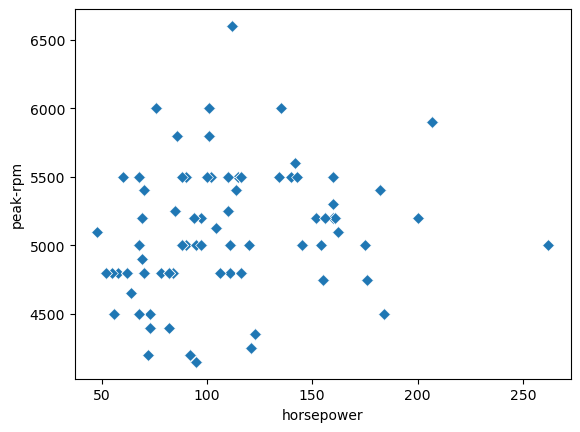

In [45]:
df[["horsepower"]] = df[["horsepower"]].astype("float")
sns.scatterplot(data=df,x="horsepower",y="peak-rpm", marker = 'D')

We see alot of overlap in certain ranges of value and it makes it hard to analyze the relationship between variables, so we now draw a hexbin plot between horsepoer and peakrpm to visualise where most of our points lie.

<AxesSubplot:xlabel='horsepower', ylabel='peak-rpm'>

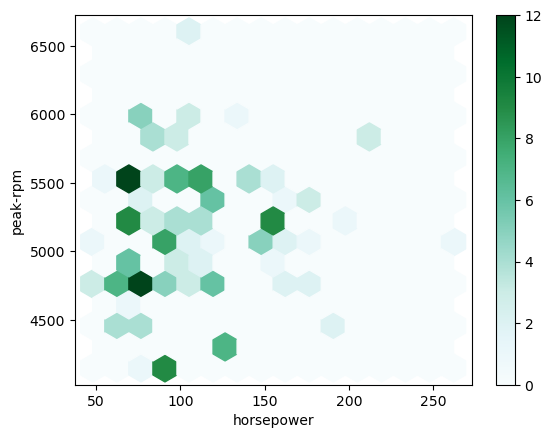

In [46]:
df.plot(x='horsepower', y='peak-rpm', kind="hexbin", gridsize=15,sharex=False)

Now we can take go ahead and get two variables hexbin plot on basis of another variable rather than density. 
The value of the hexagon is determined by the number of points in the hexagon. The C argument specifies values at the coordinate (x[i], y[i]). 
Here we took C = price. So now in each bin the values are accumulated are of price.

<AxesSubplot:xlabel='horsepower', ylabel='peak-rpm'>

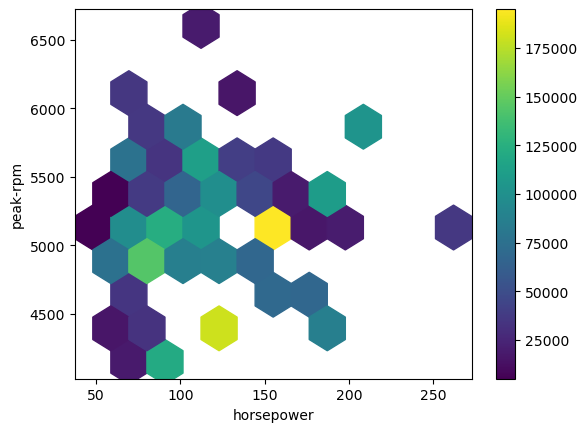

In [47]:

df.plot.hexbin(x='horsepower',
                    y='peak-rpm',
                    C='price',
                    reduce_C_function=np.sum,
                    gridsize=10,
                    cmap="viridis",sharex=False)